# CS 445 Final Project

## Image Processing Based Vehicle Number Plate Detection and Speeding Radar

---------------------------------------------------
Frame Number ---- Number Detected ---- Final Number
---------------------------------------------------
     0     -----     5     -----     
     1     -----     5     -----     
     2     -----     642245     -----     
     3     -----     642245     -----     642245
     4     -----     642245     -----     642245
     5     -----     622     -----     642245
---------------------------------------------------
Speed (kph): 60kph


<IPython.core.display.Javascript object>


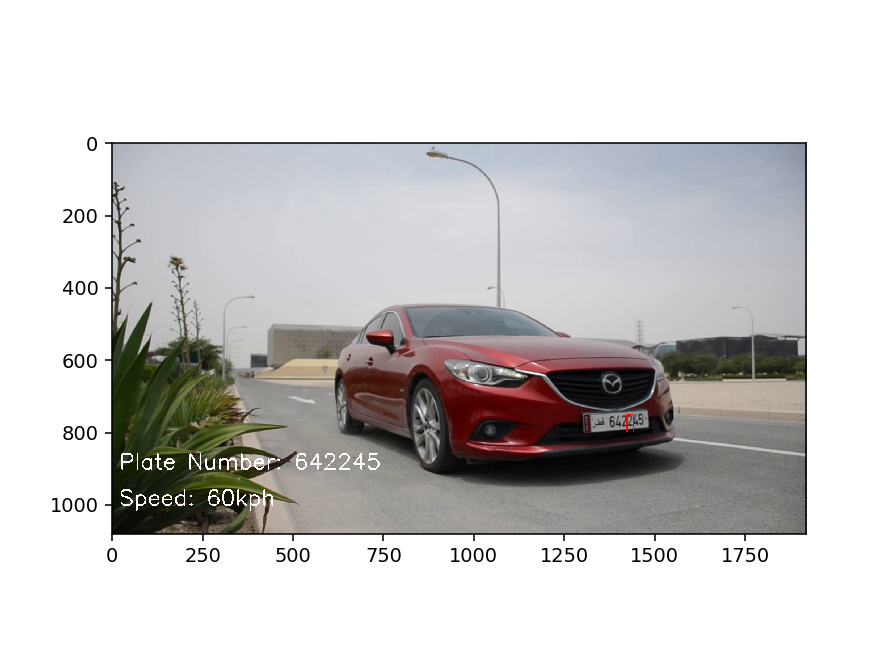

In [5]:
import cv2
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import os, os.path
from os import listdir
from os.path import isfile, join
import math
import time

def plate(image,instance,final_number):

    ### Reading frame, resizing and changing color space ###

    img_rgb = cv2.imread(image)
    img_rgb = cv2.resize(img_rgb, (1920, 1080))
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)


    ### Day/Night Determination ###

    img_avg = int(np.mean(img_rgb))
    

    ### Numbers detection ###
    
    ## Zero ##

    loc_zeros = []

    for i in range(5,14):
        
        if img_avg > 73:
            zero = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/zero/%s.png' % (i))
        elif img_avg <= 73:
            zero = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/night zero/%s.png' % (i))
            
        zero = cv2.cvtColor(zero, cv2.COLOR_BGR2GRAY)
        w, h = zero.shape[::-1]

        res_zero = cv2.matchTemplate(img_gray,zero,cv2.TM_CCOEFF_NORMED)
        threshold = 0.85
        loc_zero = np.where(res_zero >= threshold)

        if len(loc_zero[1]) > 0:
            for j in range(0,len(loc_zero[1])):
                cv2.rectangle(img_rgb,(loc_zero[1][j],loc_zero[0][j]),(loc_zero[1][j] + w, loc_zero[0][j] + h), (0,0,255), 1)
                loc_zeros.append([loc_zero[1][j],loc_zero[0][j]])
                
    loc_zeros.sort()

    # Rejection of false numbers #
    
    if len(loc_zeros) > 1:
        for i in range(0,len(loc_zeros) - 1):
                if abs(loc_zeros[i+1][0] - loc_zeros[i][0]) < 3:
                    loc_zeros[i][0] = float('inf')
                if abs(loc_zeros[i+1][0] - loc_zeros[i][0]) > 150:
                    loc_zeros[i][0] = float('inf')
        

    ## One ##

    loc_ones = []

    for i in range(8,14):
        
        if img_avg > 73:
            one = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/one/%s.png' % (i))
        elif img_avg <= 73:
            one = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/night one/%s.png' % (i))
            
        one = cv2.cvtColor(one, cv2.COLOR_BGR2GRAY)
        w, h = one.shape[::-1]

        res_one = cv2.matchTemplate(img_gray,one,cv2.TM_CCOEFF_NORMED)
        threshold = 0.9
        loc_one = np.where(res_one >= threshold)

        if len(loc_one[1]) > 0:
            for j in range(0,len(loc_one[1])):
                cv2.rectangle(img_rgb,(loc_one[1][j],loc_one[0][j]),(loc_one[1][j] + w, loc_one[0][j] + h), (0,0,255), 1)
                loc_ones.append([loc_one[1][j],loc_one[0][j]])
                
    loc_ones.sort()

    # Rejection of false numbers #

    if len(loc_ones) > 1:
        for i in range(0,len(loc_ones) - 1):
                if abs(loc_ones[i+1][0] - loc_ones[i][0]) < 3:
                    loc_ones[i][0] = float('inf')
                if abs(loc_ones[i+1][0] - loc_ones[i][0]) > 150:
                    loc_ones[i][0] = float('inf')


    ## Two ##

    loc_twos = []

    for i in range(2,16):

        if img_avg > 73:
            two = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/two/%s.png' % (i))
        elif img_avg <= 73:
            two = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/night two/%s.png' % (i))
            
        two = cv2.cvtColor(two, cv2.COLOR_BGR2GRAY)
        w, h = one.shape[::-1]

        res_two = cv2.matchTemplate(img_gray,two,cv2.TM_CCOEFF_NORMED)
        threshold = 0.9
        loc_two = np.where(res_two >= threshold)

        if len(loc_two[1]) > 0:
            for j in range(0,len(loc_two[1])):
                cv2.rectangle(img_rgb,(loc_two[1][j],loc_two[0][j]),(loc_two[1][j] + w, loc_two[0][j] + h), (0,0,255), 1)
                loc_twos.append([loc_two[1][j],loc_two[0][j]])
                
    loc_twos.sort()

    # Rejection of false numbers #

    if len(loc_twos) > 1:
        for i in range(0,len(loc_twos) - 1):
                if abs(loc_twos[i+1][0] - loc_twos[i][0]) < 3:
                    loc_twos[i][0] = float('inf')
                if abs(loc_twos[i+1][0] - loc_twos[i][0]) > 150:
                    loc_twos[i][0] = float('inf')


    ## Three ##

    loc_threes = []

    for i in range(2,16):
        
        if img_avg > 73:
            three = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/three/%s.png' % (i))
        elif img_avg <= 73:
            three = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/night three/%s.png' % (i))
            
        three = cv2.cvtColor(three, cv2.COLOR_BGR2GRAY)
        w, h = three.shape[::-1]

        res_three = cv2.matchTemplate(img_gray,three,cv2.TM_CCOEFF_NORMED)
        threshold = 0.9
        loc_three = np.where(res_three >= threshold)

        if len(loc_three[1]) > 0:
            for j in range(0,len(loc_three[1])):
                cv2.rectangle(img_rgb,(loc_three[1][j],loc_three[0][j]),(loc_three[1][j] + w, loc_three[0][j] + h), (0,0,255), 1)
                loc_threes.append([loc_three[1][j],loc_three[0][j]])
    
    loc_threes.sort()

    # Rejection of false numbers #

    if len(loc_threes) > 1:
        for i in range(0,len(loc_threes) - 1):
                if abs(loc_threes[i+1][0] - loc_threes[i][0]) < 3:
                    loc_threes[i][0] = float('inf')
                if abs(loc_threes[i+1][0] - loc_threes[i][0]) > 150:
                    loc_threes[i][0] = float('inf')


    ## Four ##

    loc_fours = []

    for i in range(3,14):
        
        if img_avg > 73:
            four = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/four/%s.png' % (i))
        elif img_avg <= 73:
            four = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/night four/%s.png' % (i))
            
        four = cv2.cvtColor(four, cv2.COLOR_BGR2GRAY)
        w, h = four.shape[::-1]

        res_four = cv2.matchTemplate(img_gray,four,cv2.TM_CCOEFF_NORMED)
        threshold = 0.9
        loc_four = np.where(res_four >= threshold)

        if len(loc_four[1]) > 0:
            for j in range(0,len(loc_four[1])):
                cv2.rectangle(img_rgb,(loc_four[1][j],loc_four[0][j]),(loc_four[1][j] + w, loc_four[0][j] + h), (0,0,255), 1)
                loc_fours.append([loc_four[1][j],loc_four[0][j]])
                
    loc_fours.sort()

    # Rejection of false numbers #

    if len(loc_fours) > 1:
        for i in range(0,len(loc_fours) - 1):
                if abs(loc_fours[i+1][0] - loc_fours[i][0]) < 3:
                    loc_fours[i][0] = float('inf')
                if abs(loc_fours[i+1][0] - loc_fours[i][0]) > 150:
                    loc_fours[i][0] = float('inf')


    ## Five ##

    loc_fives = []

    for i in range(2,14):
        
        if img_avg > 73:
            five = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/five/%s.png' % (i))
        elif img_avg <= 73:
            five = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/night five/%s.png' % (i))
            
        five = cv2.cvtColor(five, cv2.COLOR_BGR2GRAY)
        w, h = five.shape[::-1]

        res_five = cv2.matchTemplate(img_gray,five,cv2.TM_CCOEFF_NORMED)
        threshold = 0.90
        loc_five = np.where(res_five >= threshold)

        if len(loc_five[1]) > 0:
            for j in range(0,len(loc_five[1])):
                cv2.rectangle(img_rgb,(loc_five[1][j],loc_five[0][j]),(loc_five[1][j] + w, loc_five[0][j] + h), (0,0,255), 1)
                loc_fives.append([loc_five[1][j],loc_five[0][j]])
                
    loc_fives.sort()

    # Rejection of false numbers #

    if len(loc_fives) > 1:
        for i in range(0,len(loc_fives) - 1):
                if abs(loc_fives[i+1][0] - loc_fives[i][0]) < 3:
                    loc_fives[i][0] = float('inf')
                if abs(loc_fives[i+1][0] - loc_fives[i][0]) > 150:
                    loc_fives[i][0] = float('inf')
        

    ## Six ##

    loc_sixes = []

    for i in range(3,16):

        if img_avg > 73:
            six = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/six/%s.png' % (i))
        elif img_avg <= 73:
            six = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/night six/%s.png' % (i))

        six = cv2.cvtColor(six, cv2.COLOR_BGR2GRAY)
        w, h = six.shape[::-1]

        res_six = cv2.matchTemplate(img_gray,six,cv2.TM_CCOEFF_NORMED)
        threshold = 0.92
        loc_six = np.where(res_six >= threshold)

        if len(loc_six[1]) > 0:
            for j in range(0,len(loc_six[1])):
                cv2.rectangle(img_rgb,(loc_six[1][j],loc_six[0][j]),(loc_six[1][j] + w, loc_six[0][j] + h), (0,0,255), 1)
                loc_sixes.append([loc_six[1][j],loc_six[0][j]])
                
    loc_sixes.sort()

    # Rejection of false numbers #

    if len(loc_sixes) > 1:
        for i in range(0,len(loc_sixes) - 1):
                if abs(loc_sixes[i+1][0] - loc_sixes[i][0]) < 3:
                    loc_sixes[i][0] = float('inf')
                if abs(loc_sixes[i+1][0] - loc_sixes[i][0]) > 150:
                    loc_sixes[i][0] = float('inf')   

    ## Seven ##

    loc_sevens = []

    for i in range(2,16):
        
        if img_avg > 73:
            seven = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/seven/%s.png' % (i))
        elif img_avg <= 73:
            seven = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/night seven/%s.png' % (i))

        seven = cv2.cvtColor(seven, cv2.COLOR_BGR2GRAY)
        w, h = seven.shape[::-1]

        res_seven = cv2.matchTemplate(img_gray,seven,cv2.TM_CCOEFF_NORMED)
        threshold = 0.9
        loc_seven = np.where(res_seven >= threshold)

        if len(loc_seven[1]) > 0:
            for j in range(0,len(loc_seven[1])):
                cv2.rectangle(img_rgb,(loc_seven[1][j],loc_seven[0][j]),(loc_seven[1][j] + w, loc_seven[0][j] + h), (0,0,255), 1)
                loc_sevens.append([loc_seven[1][j],loc_seven[0][j]])
                
    loc_sevens.sort()

    # Rejection of false numbers #

    if len(loc_sevens) > 1:
        for i in range(0,len(loc_sevens) - 1):
                if abs(loc_sevens[i+1][0] - loc_sevens[i][0]) < 3:
                    loc_sevens[i][0] = float('inf')
                if abs(loc_sevens[i+1][0] - loc_sevens[i][0]) > 150:
                    loc_sevens[i][0] = float('inf')


    ## Eight ##

    loc_eights = []

    for i in range(2,16):
        
        if img_avg > 73:
            eight = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/eight/%s.png' % (i))
        elif img_avg <= 73:
            eight = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/night eight/%s.png' % (i))

        eight = cv2.cvtColor(eight, cv2.COLOR_BGR2GRAY)
        w, h = eight.shape[::-1]

        res_eight = cv2.matchTemplate(img_gray,eight,cv2.TM_CCOEFF_NORMED)
        threshold = 0.9
        loc_eight = np.where(res_eight >= threshold)

        if len(loc_eight[1]) > 0:
            for j in range(0,len(loc_eight[1])):
                cv2.rectangle(img_rgb,(loc_eight[1][j],loc_eight[0][j]),(loc_eight[1][j] + w, loc_eight[0][j] + h), (0,0,255), 1)
                loc_eights.append([loc_eight[1][j],loc_eight[0][j]])
                
    loc_eights.sort()

    # Rejection of false numbers #

    if len(loc_eights) > 1:
        for i in range(0,len(loc_eights) - 1):
                if abs(loc_eights[i+1][0] - loc_eights[i][0]) < 3:
                    loc_eights[i][0] = float('inf')
                if abs(loc_eights[i+1][0] - loc_eights[i][0]) > 150:
                    loc_eights[i][0] = float('inf')


    ## Nine ##

    loc_nines = []

    for i in range(2,16):
        
        if img_avg > 73:
            nine = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/nine/%s.png' % (i))
        elif img_avg <= 73:
            nine = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/night nine/%s.png' % (i))

        nine = cv2.cvtColor(nine, cv2.COLOR_BGR2GRAY)
        w, h = nine.shape[::-1]

        res_nine = cv2.matchTemplate(img_gray,nine,cv2.TM_CCOEFF_NORMED)
        threshold = 0.9
        loc_nine = np.where(res_nine >= threshold)

        if len(loc_nine[1]) > 0:
            for j in range(0,len(loc_nine[1])):
                cv2.rectangle(img_rgb,(loc_nine[1][j],loc_nine[0][j]),(loc_nine[1][j] + w, loc_nine[0][j] + h), (0,0,255), 1)
                loc_nines.append([loc_nine[1][j],loc_nine[0][j]])
                
    loc_nines.sort()

    # Rejection of false numbers #

    if len(loc_nines) > 1:
        for i in range(0,len(loc_nines) - 1):
                if abs(loc_nines[i+1][0] - loc_nines[i][0]) < 3:
                    loc_nines[i][0] = float('inf')
                if abs(loc_nines[i+1][0] - loc_nines[i][0]) > 150:
                    loc_nines[i][0] = float('inf')
            
        

    ### Reading Number ###

    plate_number = []

    for i in range(0,len(loc_zeros)):
        if loc_zeros[i][0] < float('inf'):
            plate_number.append([loc_zeros[i][0],0])

    for i in range(0,len(loc_ones)):
        if loc_ones[i][0] < float('inf'):
            plate_number.append([loc_ones[i][0],1])

    for i in range(0,len(loc_twos)):
        if loc_twos[i][0] < float('inf'):
            plate_number.append([loc_twos[i][0],2])

    for i in range(0,len(loc_threes)):
        if loc_threes[i][0] < float('inf'):
            plate_number.append([loc_threes[i][0],3])

    for i in range(0,len(loc_fours)):
        if loc_fours[i][0] < float('inf'):
            plate_number.append([loc_fours[i][0],4])

    for i in range(0,len(loc_fives)):
        if loc_fives[i][0] < float('inf'):
            plate_number.append([loc_fives[i][0],5])

    for i in range(0,len(loc_sixes)):
        if loc_sixes[i][0] < float('inf'):
            plate_number.append([loc_sixes[i][0],6])

    for i in range(0,len(loc_sevens)):
        if loc_sevens[i][0] < float('inf'):
            plate_number.append([loc_sevens[i][0],7])

    for i in range(0,len(loc_eights)):
        if loc_eights[i][0] < float('inf'):
            plate_number.append([loc_eights[i][0],8])

    for i in range(0,len(loc_nines)):
        if loc_nines[i][0] < float('inf'):
            plate_number.append([loc_nines[i][0],9])


    plate_number.sort()

    number = [str(x) for (v,x) in plate_number]
    number = ''.join(number)

    img_plate = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2RGB)

    ### Writing plate number on frame ###

    if final_number == '':
        cv2.putText(img_plate,'Plate Number: %s' % (number),(20,900), cv2.FONT_HERSHEY_SIMPLEX, 2,(255,255,255),4)
    elif final_number != '':
        cv2.putText(img_plate,'Plate Number: %s' % (final_number),(20,900), cv2.FONT_HERSHEY_SIMPLEX, 2,(255,255,255),4)

    if len(number) > 0:
        plt.imsave('C:/Users/Mohammad Khorasani/Desktop/img/%s.png' % (instance),img_plate)

    return number


start_time = time.time()
final_number = ''
temp = ''

### Printing detected number for each frame in input video ###

print('---------------------------------------------------')
print('Frame Number ---- Number Detected ---- Final Number')
print('---------------------------------------------------')


### Array to store plate numbers ###

plates = []


### Executing plate detection function over all frames in recorded video ###

for i in range(0,6):

    if final_number == '':
        if len(temp) == 6:
            final_number = temp
    
    temp = plate('C:/Users/Mohammad Khorasani/Desktop/70kph/%s.png' % (i),i,final_number)

    if len(temp) > 0:
        plates.append(temp)
        
    print('     %s     -----     %s     -----     %s' % (i,temp,final_number))

print('---------------------------------------------------')


### Determining vehicle speed based on power regression model ###

speed = int((round(224.49*(len(plates))**-0.737,0)))
speed = str(speed) + 'kph'
print('Speed (kph): %s' % (speed))

file_names = [f for f in listdir('C:/Users/Mohammad Khorasani/Desktop/img') if isfile(join('C:/Users/Mohammad Khorasani/Desktop/img', f))]


### Writing vehicle speed on recorded frames ###

imgs = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/img/%s.png' % (i))
imgs = cv2.cvtColor(imgs,cv2.COLOR_BGR2RGB)
cv2.putText(imgs,'Speed: %s' % (speed),(20,1000), cv2.FONT_HERSHEY_SIMPLEX, 2,(255,255,255),4)
plt.imsave('C:/Users/Mohammad Khorasani/Desktop/img/%s.png' % (i),imgs)

display_img = cv2.imread('C:/Users/Mohammad Khorasani/Desktop/img/%s.png' % (i))
display_img = cv2.cvtColor(display_img,cv2.COLOR_RGB2BGR)
plt.imshow(display_img)
